# Use eANN

In this notebook we show how to use the ensemble neural network. As before let's load a spycon test.

In [1]:
# Basic imports
from matplotlib import pyplot
import spycon
from spycon.spycon_tests import load_test

Using cpu device


In [2]:
spycon_test = load_test(name='ren_simulation_1917_Cell1Block1_long_340_20_ei5_example', path='../data/gt_data/', params={"T_stop": 600})

Now let's setup the ensemble. For that we need to create the dictionary, which contains the base methods. See `setup_ensemble.py` that sets up the dictionary used for the eANN presented in the paper. Note, that this dictionary must be the one, the network was trained with. (Later in this tutorial we will see how to train our custom network.) 

With this dictionary we can create the network.

In [3]:
from spycon import coninf

base_methods, model_name = coninf.setup_ensemble.get_eann_coninf_dict(num_cores=4)

eANN_params = {"name": model_name,
               "con_inf_dict": base_methods,}
eANN = coninf.sci_ensemble.NNEnsemble(params=eANN_params)

##### Trained model successfully loaded #####


Now, we can run the ensemble network as before the other `SpikeConnectivityInference` methods. However, one should note, that by default, the for making predictions we need to run all the base methods on the data we want to test, because from these results the input to the network is constructed. If we have run already (at least) some methods on the data and saved the result, there is the option, to load the results, and provide them to the inference. This way, double computation can be avoided. _Caution_: The parameters of the base methods should be the same as used for the training.

In [4]:
# The line below would run all the base methods on the test data, which takes some time.   
# eANN_result = eANN.infer_connectivity(spycon_test.times, spycon_test.ids parallel=True)

# This runs all the base methods once and saves the results.
# result_path = '../data/results/'
# for base_method_name, base_method in base_methods.items():
#     result = base_method.infer_connectivity(spycon_test.times, spycon_test.ids, parallel=True)
#     result.save(f'{spycon_test.name}_{base_method_name}', result_path)
    
# Instead, we load the results from the previous run below
result_path = '../data/results/'
result_dict = {}
for base_method_name in base_methods.keys():
    result_dict[base_method_name] = spycon.load_connectivity_result(f'{spycon_test.name}_{base_method_name}', result_path)
# We provide the results to the ensemble and it takes only a few seconds to run
result_dict['eANN'] = eANN.infer_connectivity(spycon_test.times, spycon_test.ids, spycon_result_dict=result_dict, parallel=True)

##### Creating dataset #####
##### Making predictions #####


Now we evaluate the different methods on the test. We see, that all methods perform quite well, but the eANN shows perfect classification (keep in mind that this is only a test example).

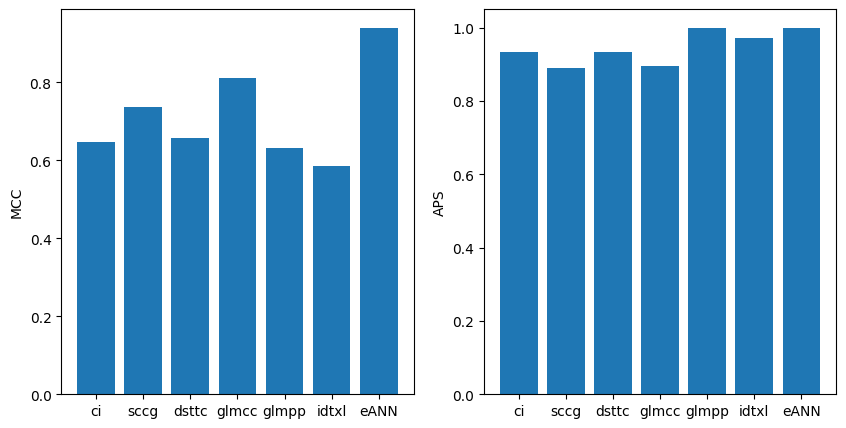

In [5]:
mcc, aps, names = [], [], []

for method_name in result_dict.keys():
    metrics = spycon_test.eval_performance(result_dict[method_name])
    mcc.append(metrics['mcc'][0])
    aps.append(metrics['aps'][0])
    names.append(method_name)
    
pyplot.figure(figsize=(10, 5))
pyplot.subplot(1, 2, 1)
pyplot.bar(names, mcc)
pyplot.ylabel('MCC')
pyplot.subplot(1, 2, 2)
pyplot.bar(names, aps)
pyplot.ylabel('APS')
pyplot.show()